In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'
pokemon_df=pd.read_csv(datadirectory+'pokemon.csv')

In [3]:
#8
pokemon_df['Power']=pokemon_df['Attack']+pokemon_df['Speed']
new_subset=pokemon_df.loc[:,['Name','Type 1','Power']].rename(
    columns={'Type 1':'Type'}).sort_values(by='Power', ascending=False).iloc[0:5,]
                                                                                                           
print(new_subset)


                        Name     Type  Power
163      MewtwoMega Mewtwo X  Psychic    380
232  HeracrossMega Heracross      Bug    370
424    GroudonPrimal Groudon   Ground    360
426    RayquazaMega Rayquaza   Dragon    360
429       DeoxysAttack Forme  Psychic    360


In [3]:
#with the clean pokemon data, select all the 'Fire' of Type 1 and make them into 'FIRE' - use loc
pokemon_df.loc[pokemon_df['Type 1']=='Fire','Type 1']='FIRE'

#after, select the first 10 pokemon and change their Total to 0
pokemon_df.iloc[0:10,4]=0

#then replace all the r in the names with 'R' - use list comprehension 
pokemon_df['Name']=[i.replace('r','R') for i in pokemon_df['Name']]

pokemon_df

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,BulbasauR,Grass,Poison,0,45,49,49,65,65,45,1,False
1,2,IvysauR,Grass,Poison,0,60,62,63,80,80,60,1,False
2,3,VenusauR,Grass,Poison,0,80,82,83,100,100,80,1,False
3,3,VenusauRMega VenusauR,Grass,Poison,0,80,100,123,122,120,80,1,False
4,4,ChaRmandeR,FIRE,NaN,0,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
my_df1=pd.DataFrame({'names':['Gohan','Naruto','Luffy'],'color':['blue','orange','red']})
my_df2=pd.DataFrame({'names':['Gohan','Naruto','Luffy'],'power':[9000,8000,7000]})
my_df3=pd.DataFrame({'power':[9000,8000,7000],'enemy':['Cell','Sasuke','Blackbeard']})

#11
my_combined_df=pd.merge(my_df1,my_df2,on='names')
my_combined_df_out=pd.merge(my_combined_df,my_df3,on=['power'])
my_combined_df_out

#or in one line
my_combined_df=my_df1.merge(my_df2,on='names').merge(my_df3,on='power')
print(my_combined_df)

    names   color  power       enemy
0   Gohan    blue   9000        Cell
1  Naruto  orange   8000      Sasuke
2   Luffy     red   7000  Blackbeard


In [5]:
#13
city=['Seoul','Bankok','Monteverde','San Diego']
food=['tteokbokki ','pad-thai','casado','Shrimp cocktail']
company=['friend','family','alone','friend']

#dictionary with city and food
name_food_dict=dict(zip(city,food))

#new table with range of four and four column names too 
new_frame=pd.DataFrame(index=range(4),columns=['city','food','company','letters in food'])

for k,i in enumerate(city):
    #select the row with enumerate and the column with a value
    new_frame.iloc[k,0]=i
    #the second column will have the dictionary value for a name
    new_frame.iloc[k,1]=name_food_dict.get(i)
    
    #the third column will be populated by this statement 
    new_frame.iloc[k,2]=company[k]  
    
    #the fourth column will ve populted by this statement
    new_frame.iloc[k,3]=len(name_food_dict.get(i))

#remeber to call the table in the last line of the cell so we can see it   
print(new_frame)

         city             food company letters in food
0       Seoul      tteokbokki   friend              11
1      Bankok         pad-thai  family               8
2  Monteverde           casado   alone               6
3   San Diego  Shrimp cocktail  friend              15


# Homework Q1

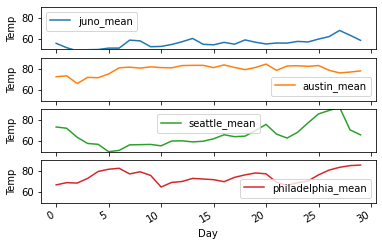

In [6]:
#the cities Katie could move to
cities=['juno','austin','seattle','philadelphia']

#a function that opens the city file and return the column with average, the only argument it takes in is the name of the city 
def open_june_average(city):
    #you need one line of code to open the file- use the correct command to open a txt, 
    #also note that these files do not have a header
    #there are three columns, and the second column or index 1 is the one with the average
    #the columns do not have name so after selecting to yse the columns with average give it a name
    #the name should be dynamic- so city_mean where city changes based on the city you give the function 
    city_file=pd.read_table(datadirectory+f'{city}_june21.txt',header=None,usecols=[1],names=[f'{city}_mean'])
    #return the file 
    return city_file

#create a new list that will hold the tables we make for each city 
city_info=[]

#use a for loop to run open_june_average for each city, the append the table to the city_info list using append 
for i in cities:
    city_data=open_june_average(i)
    city_info.append(city_data)

#combine all the tables in the city_info list, we are combining by columns so remember to use the correct axis 
full_table=pd.concat(city_info,axis=1)

#make a plot from the table - I wrote all the commands for you already - but you make the plot pretty 
#the xlabel should be day and y label Temp, change the limits so all the y axis are the same 
full_table.plot(subplots=True,ylim=(50,90),xlabel='Day',ylabel='Temp')


plt.show()    

# Homework - Q2

In [7]:
def get_lake_wanted(lake):
    #read_data_in
    temp_data_2010_2015=pd.read_csv(datadirectory+'gl_average_lake_temp_2010-2015.csv')
    temp_data_2016_2020=pd.read_csv(datadirectory+'gl_average_lake_temp_2016-2020.csv')
    
    frames=[temp_data_2010_2015,temp_data_2016_2020]
    full_temp=pd.concat(frames,axis=0)
    lake_wanted=full_temp.loc[full_temp['lake']==lake,].copy()
    lake_wanted.rename(columns={'day':'Day','year':'Year','temp':'Temp','lake':'Lake'},inplace=True)
    
    return lake_wanted

get_lake_wanted('MI')

,Day,Year,Temp,Lake
4382,1,2010,3.12,MI
4383,2,2010,2.91,MI
4384,3,2010,2.83,MI
4385,4,2010,2.92,MI
4386,5,2010,2.41,MI
...,...,...,...,...
5344,318,2020,9.14,MI
5345,319,2020,9.01,MI
5346,320,2020,8.91,MI
5347,321,2020,8.73,MI
